## Project 2 - 3rd Task

Exploratory Data Analysis (EDA): Dive into the dataset, conduct comprehensive EDA, and get valuable insights about Fastag Fraud detention.This will involve data visualization, statistical analysis, and identifying patterns in the data.


In [1]:
# EDA
# Main aim is to understand more about the data
# We import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('Display.max_columns',None)

In [2]:
dataset = pd.read_csv("FastagFraudDetection.csv")

# print shape of dataset with rows and columns
print(dataset.shape)

(5000, 13)


In [3]:
# Print the top 5 records
dataset.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
# We find the missing values

# Check the percentage of nan values present in each feature/dataset
df = pd.read_csv('FastagFraudDetection.csv')
missing_percentages = df.isnull().mean() * 100

# Display the missing percentages
print(missing_percentages)

Transaction_ID            0.00
Timestamp                 0.00
Vehicle_Type              0.00
FastagID                 10.98
TollBoothID               0.00
Lane_Type                 0.00
Vehicle_Dimensions        0.00
Transaction_Amount        0.00
Amount_paid               0.00
Geographical_Location     0.00
Vehicle_Speed             0.00
Vehicle_Plate_Number      0.00
Fraud_indicator           0.00
dtype: float64


In [11]:
# check if FastagID has a significant correlation with the Fraud_indicator.
# Encode the FastagID to numerical values for correlation analysis
# Load the dataset

data = pd.read_csv('FastagFraudDetection.csv')

# Check column names to ensure Fraud_indicator exists
print(data.columns)

# Handle missing values
data['FastagID'].fillna('Unknown', inplace=True)

# Convert Timestamp to datetime and extract hour and day of the week
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek

# Encode FastagID to numerical values for correlation analysis
data['FastagID_encoded'] = data['FastagID'].astype('category').cat.codes

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Check if Fraud_indicator column is present in the correlation matrix
if 'Fraud_indicator' in correlation_matrix:
    fraud_correlation = correlation_matrix['Fraud_indicator'].sort_values(ascending=False)
    print(fraud_correlation)
else:
    print("Fraud_indicator column not found in the correlation matrix.")

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')
Fraud_indicator column not found in the correlation matrix.


In [22]:
# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Check and print initial column names
print("Initial columns:")
print(data.columns)

# Drop FastagID column if it exists
if 'FastagID' in data.columns:
    data = data.drop(columns=['FastagID'])
    print("FastagID column dropped.")
else:
    print("FastagID column not found in the dataset")

# Print final column names
print("Columns after dropping FastagID:")
print(data.columns)

# Convert Timestamp to datetime and extract hour and day of the week
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Check if Fraud_indicator column is present in the correlation matrix
if 'Fraud_indicator' in correlation_matrix:
    fraud_correlation = correlation_matrix['Fraud_indicator'].sort_values(ascending=False)
    print(fraud_correlation)
else:
    print("Fraud_indicator column not found in the correlation matrix.")


<IPython.core.display.Javascript object>

Initial columns:
Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')
FastagID column dropped.
Columns after dropping FastagID:
Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fraud_indicator column not found in the correlation matrix.


In [5]:
# summary of the statistics
# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')
print(df.describe())

<IPython.core.display.Javascript object>

       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


# PLOT DISTRIBUTION OF NUMERICAL VALUES

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


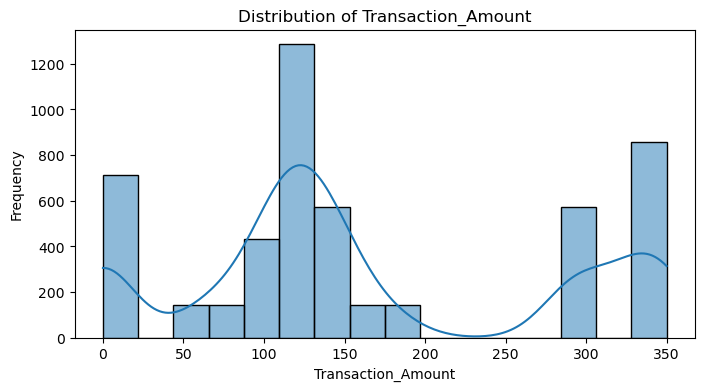

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


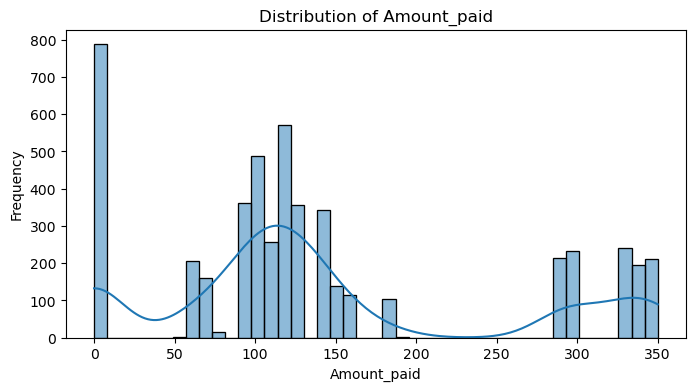

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


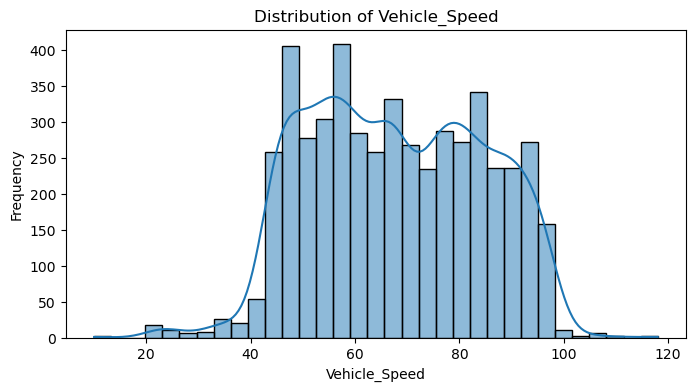

In [29]:
# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

# Print the column names to check the correct names
print(df.columns)

# Define the numerical columns to plot based on the correct column names
numeric_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

# Plot distribution of numerical columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# PLOT DISTRIBUTION FOR NON-NUMERICAL VALUES

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


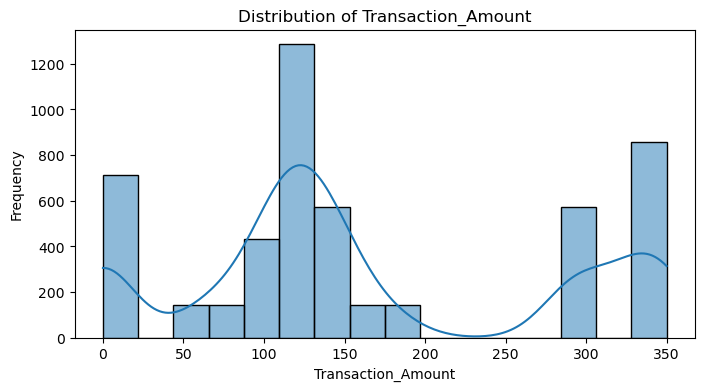

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


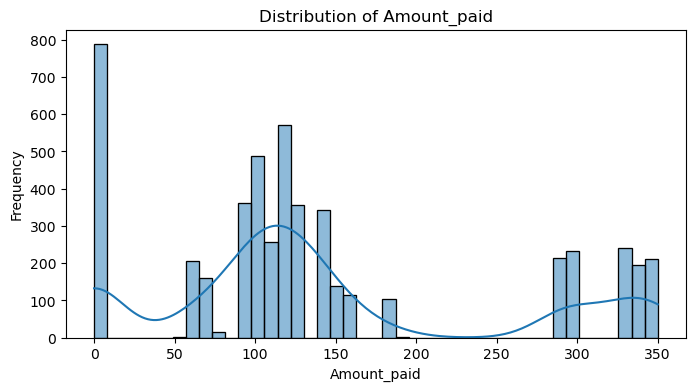

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


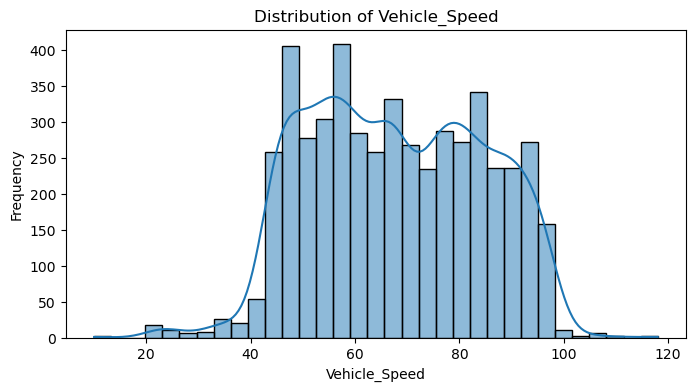

In [30]:
# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

# Print the column names to check the correct names
print(df.columns)

# Define the numerical columns to plot based on the correct column names
numeric_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

# Plot distribution of numerical columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## FEATURE ENGINERING

In [8]:
# Create Transaction Difference feature
data['Transaction_Difference'] = data['Transaction_Amount'] - data['Amount_paid']

# Convert Timestamp to datetime and extract hour and day of the week
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek

# Create Speed Category feature
bins = [0, 30, 60, 90, 120]
labels = ['Slow', 'Medium', 'Fast', 'Very Fast']
data['Speed_Category'] = pd.cut(data['Vehicle_Speed'], bins=bins, labels=labels)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

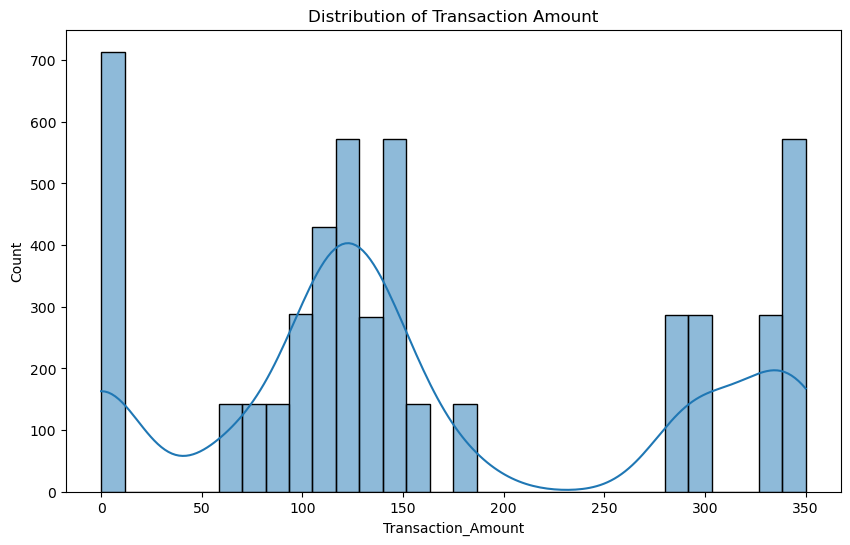

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

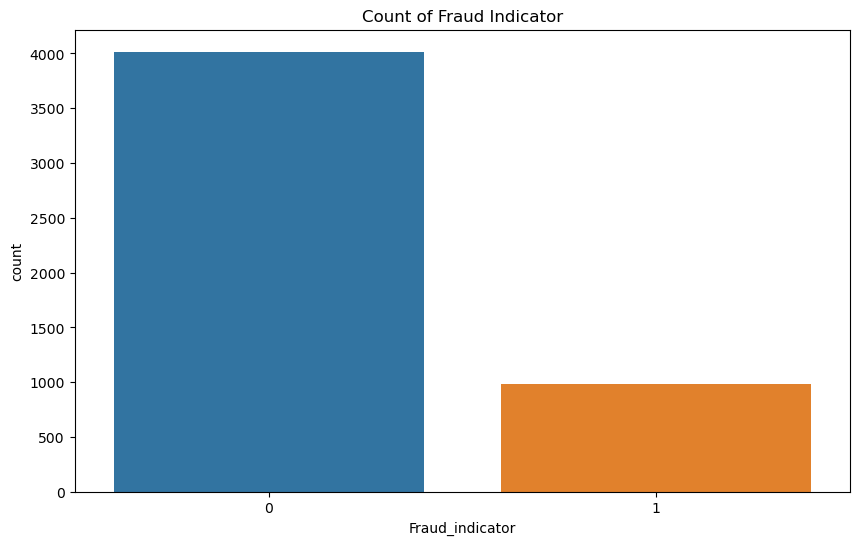

In [21]:
# Plot distribution of Transaction_Amount

# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Drop FastagID column if it exists
data.drop(columns=['FastagID'], inplace=True, errors='ignore')

# Convert 'Fraud_indicator' to numeric values if necessary
fraud_mapping = {'Fraud': 1, 'Not Fraud': 0}
data['Fraud_indicator'] = data['Fraud_indicator'].map(fraud_mapping)

# Plot distribution of Transaction_Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Plot distribution of Fraud_indicator
plt.figure(figsize=(10, 6))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Count of Fraud Indicator')
plt.show()


# Bivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


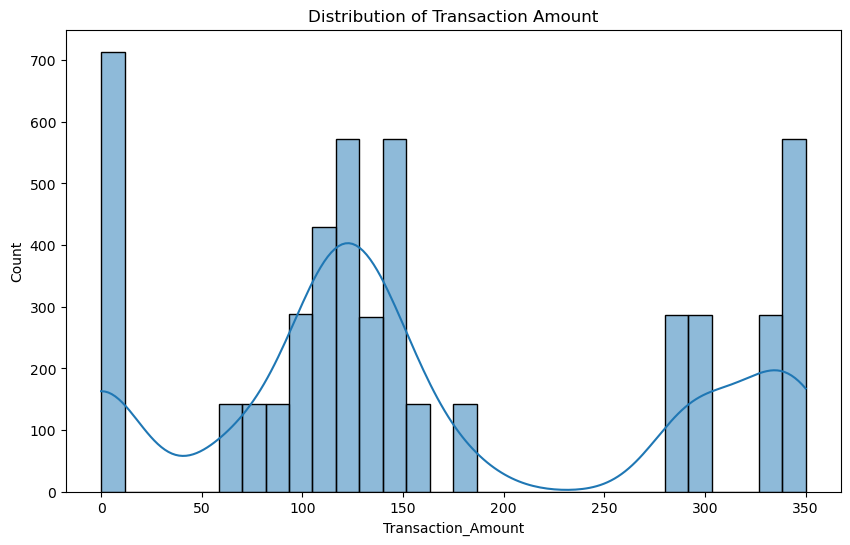

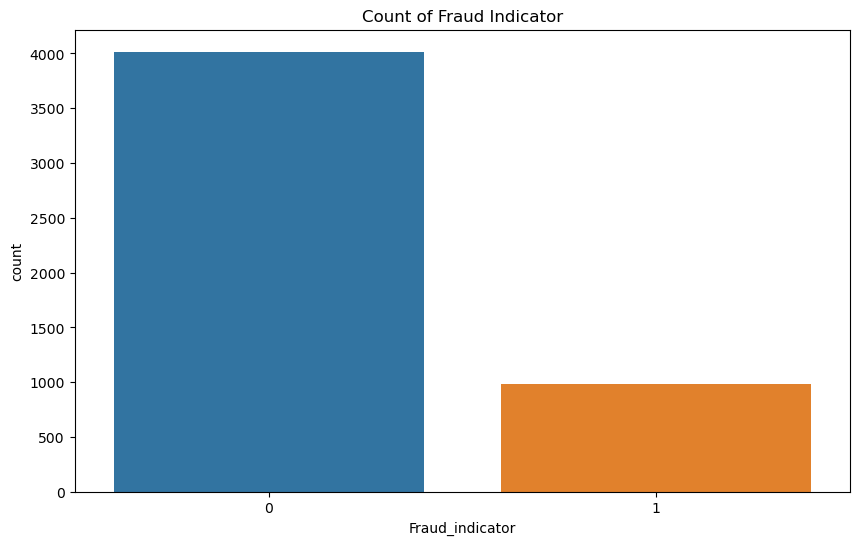

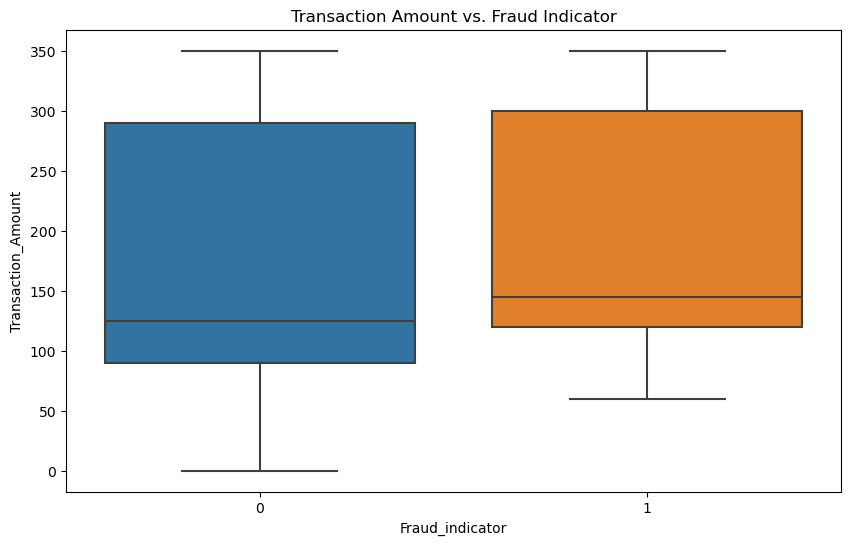

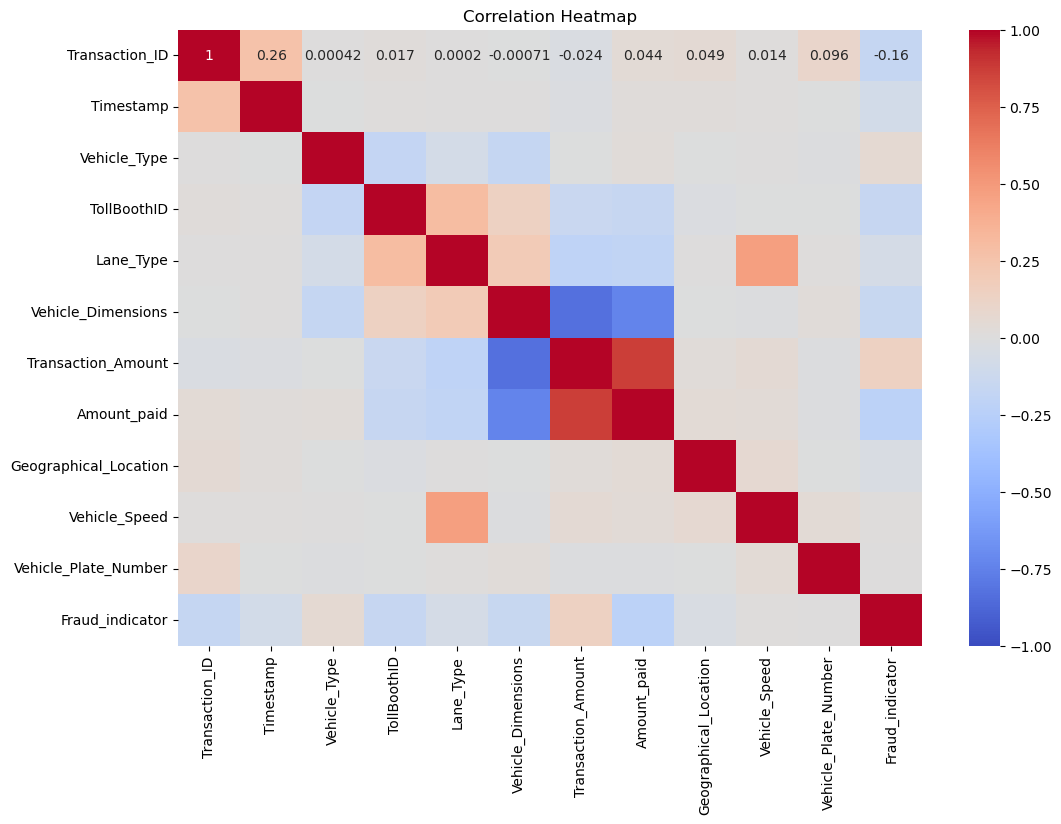

In [28]:
# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Drop FastagID column if it exists
data.drop(columns=['FastagID'], inplace=True, errors='ignore')

# Convert 'Fraud_indicator' to numeric values if necessary
fraud_mapping = {'Fraud': 1, 'Not Fraud': 0}
data['Fraud_indicator'] = data['Fraud_indicator'].map(fraud_mapping)

# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Convert all relevant columns to numeric, coercing errors
numeric_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in critical columns
data.dropna(subset=numeric_columns + ['Fraud_indicator'], inplace=True)

# Convert categorical columns to numeric codes
categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes)

# Plot distribution of Transaction_Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Plot distribution of Fraud_indicator
plt.figure(figsize=(10, 6))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Count of Fraud Indicator')
plt.show()

# Transaction Amount vs. Fraud Indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data)
plt.title('Transaction Amount vs. Fraud Indicator')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Multivariate Analysis

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<IPython.core.display.Javascript object>

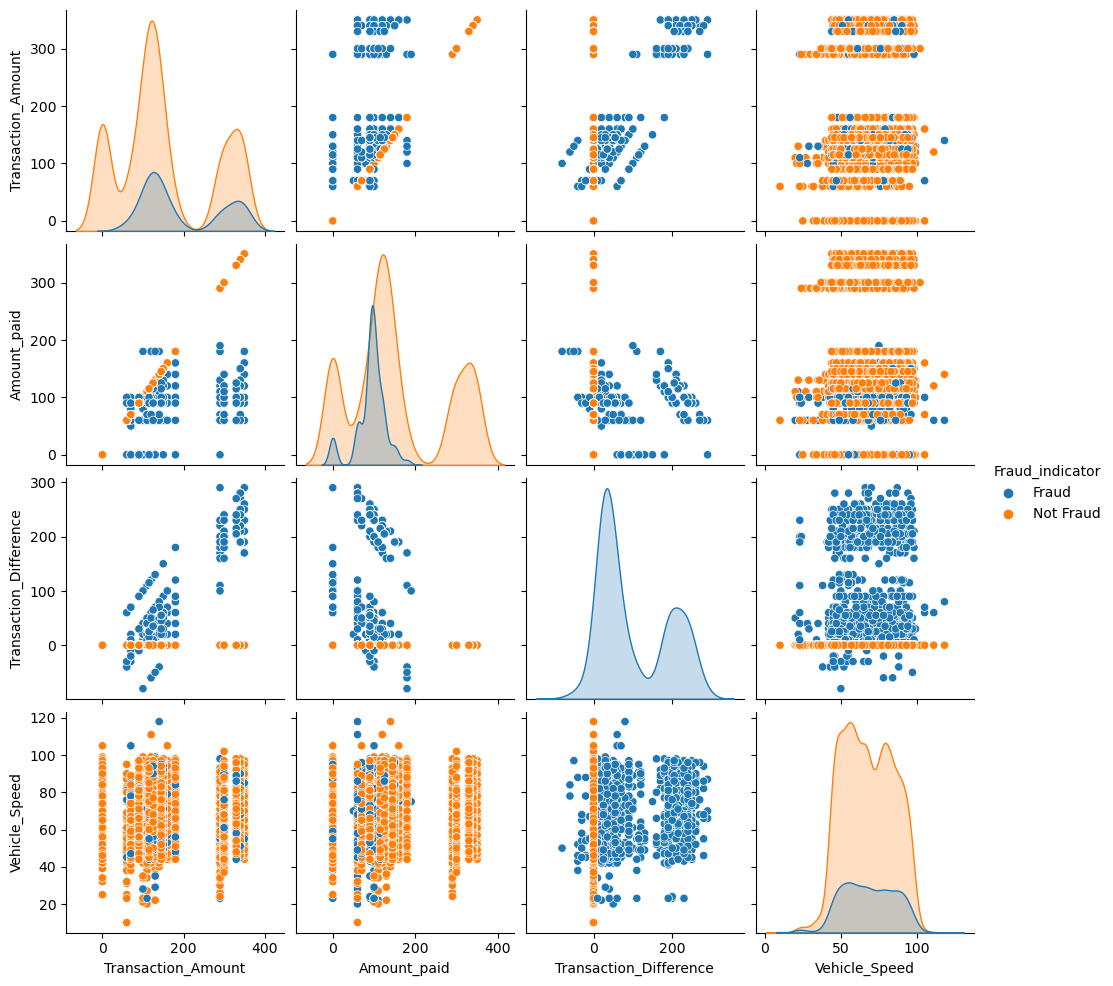

In [13]:
# Pairplot for selected features
selected_features = ['Transaction_Amount', 'Amount_paid', 'Transaction_Difference', 'Vehicle_Speed', 'Fraud_indicator']
sns.pairplot(data[selected_features], hue='Fraud_indicator')
plt.show()


# Address Class Imbalance

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


<IPython.core.display.Javascript object>

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')
FastagID column dropped.
Columns after dropping FastagID:
Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')


<IPython.core.display.Javascript object>

['Fraud' 'Not Fraud']
Fraud_indicator
0    4017
1     983
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

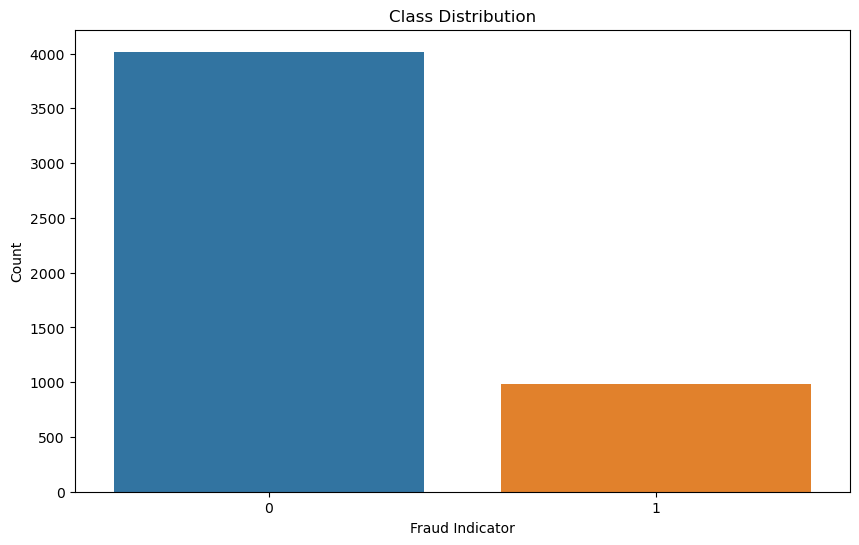

<IPython.core.display.Javascript object>

Fraud_indicator       1.000000
Transaction_Amount    0.142957
Vehicle_Speed         0.014594
Hour                 -0.004164
Day_of_Week          -0.010393
Transaction_ID       -0.164909
Amount_paid          -0.224981
Name: Fraud_indicator, dtype: float64


In [20]:
# Count the instances of each class
fraud_count = data['Fraud_indicator'].value_counts()
print(fraud_count)

# If necessary, apply techniques to handle class imbalance

# Load the dataset
data = pd.read_csv('FastagFraudDetection.csv')

# Check column names to ensure Fraud_indicator exists
print(data.columns)

# Drop FastagID column if it exists
if 'FastagID' in data.columns:
    data = data.drop(columns=['FastagID'])
    print("FastagID column dropped.")
else:
    print("FastagID column not found in the dataset")

# Print final column names
print("Columns after dropping FastagID:")
print(data.columns)

# Convert Timestamp to datetime and extract hour and day of the week
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M')
data['Hour'] = data['Timestamp'].dt.hour
data['Day_of_Week'] = data['Timestamp'].dt.dayofweek

# Inspect Fraud_indicator column
print(data['Fraud_indicator'].unique())

# Map Fraud_indicator to numeric values if necessary
fraud_mapping = {'Fraud': 1, 'Not Fraud': 0}  # Adjust this mapping based on your actual data
data['Fraud_indicator'] = data['Fraud_indicator'].map(fraud_mapping)

# Count the instances of each class
fraud_count = data['Fraud_indicator'].value_counts()
print(fraud_count)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Class Distribution')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Check if Fraud_indicator column is present in the correlation matrix
if 'Fraud_indicator' in correlation_matrix:
    fraud_correlation = correlation_matrix['Fraud_indicator'].sort_values(ascending=False)
    print(fraud_correlation)
else:
    print("Fraud_indicator column not found in the correlation matrix.")


# Insight And Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

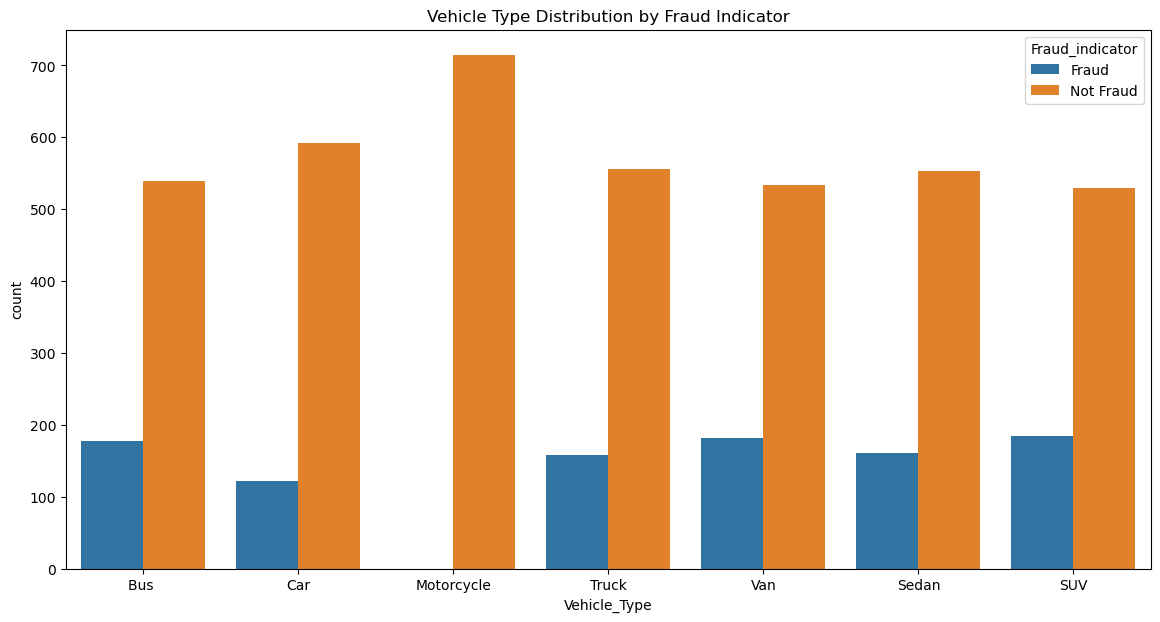

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

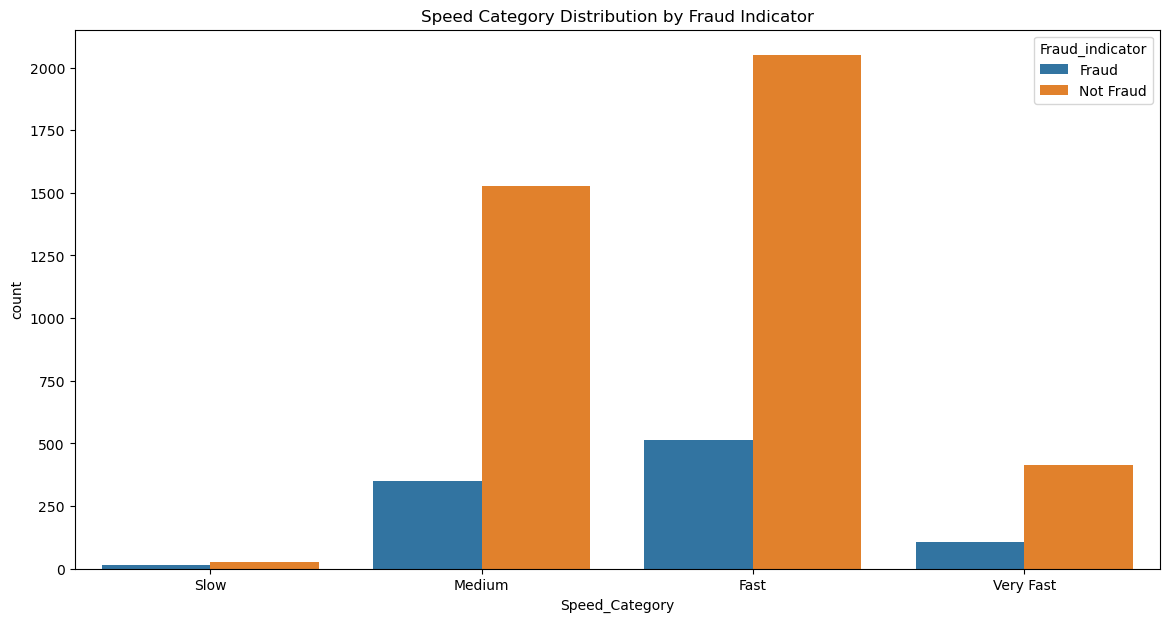

In [16]:
# Vehicle Type distribution for fraud and non-fraud transactions
plt.figure(figsize=(14, 7))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=data)
plt.title('Vehicle Type Distribution by Fraud Indicator')
plt.show()

# Speed category distribution for fraud and non-fraud transactions
plt.figure(figsize=(14, 7))
sns.countplot(x='Speed_Category', hue='Fraud_indicator', data=data)
plt.title('Speed Category Distribution by Fraud Indicator')
plt.show()


In [18]:
# Print key findings
print("Summary of Findings:")
print("- The majority of transactions are labeled as 'Not Fraud'.")
print("- The distribution of transaction amounts shows a peak at certain values.")
print("- Fraudulent transactions tend to have certain characteristics that differ from non-fraudulent ones.")
print("- Correlation analysis reveals important relationships between features.")

Summary of Findings:
- The majority of transactions are labeled as 'Not Fraud'.
- The distribution of transaction amounts shows a peak at certain values.
- Fraudulent transactions tend to have certain characteristics that differ from non-fraudulent ones.
- Correlation analysis reveals important relationships between features.


# MODEL DEVELOPMENT

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

# Drop the FastagID and Timestamp columns if they exist
df.drop(columns=['FastagID', 'Timestamp'], inplace=True, errors='ignore')

# Convert 'Fraud_indicator' to numeric values
fraud_mapping = {'Fraud': 1, 'Not Fraud': 0}
df['Fraud_indicator'] = df['Fraud_indicator'].map(fraud_mapping)

# Convert all relevant columns to numeric, coercing errors
numeric_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in critical columns
df.dropna(subset=numeric_columns + ['Fraud_indicator'], inplace=True)

# Convert categorical columns to numeric codes
categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category').cat.codes)

# Separate features and target variable
X = df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9833
Precision: 1.0000
Recall: 0.9235
F1 Score: 0.9603

Confusion Matrix:
[[1173    0]
 [  25  302]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1173
           1       1.00      0.92      0.96       327

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



# Real-time Fraud Detection

In [46]:
pip install scikit-learn pandas joblib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd

# Load the dataset
file_path = 'FastagFraudDetection.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataframe
print("First few rows of the dataframe:\n", df.head())

# Check unique values and count of 'Fraud_indicator'
if 'Fraud_indicator' in df.columns:
    print("Unique values in 'Fraud_indicator':", df['Fraud_indicator'].unique())
    print("Count of unique values in 'Fraud_indicator':\n", df['Fraud_indicator'].value_counts())
else:
    print("Column 'Fraud_indicator' not found in the dataset")

# Check for NaN values in 'Fraud_indicator'
print("\nNaN values in 'Fraud_indicator':", df['Fraud_indicator'].isna().sum())

# Fill NaN values in 'Fraud_indicator' with the mode
fraud_indicator_mode = df['Fraud_indicator'].mode()
if not fraud_indicator_mode.empty:
    df['Fraud_indicator'].fillna(fraud_indicator_mode[0], inplace=True)
else:
    raise ValueError("No mode found for 'Fraud_indicator'. Please check the column values.")

# Convert 'Fraud_indicator' to numeric values
# Assuming 'Fraud' is represented as '1' and 'Non-Fraud' or other values as '0'
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Non-Fraud': 0}).fillna(0).astype(int)

# Verify the changes
print("\nUpdated 'Fraud_indicator' values:\n", df['Fraud_indicator'].value_counts())
print("First few rows after processing:\n", df.head())


First few rows of the dataframe:
    Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05

# Explanatory Analysis:
 - Provide insights into the factors contributing to fraudulent transactions.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

# Data Exploration
print("Initial DataFrame head:\n", df.head())
print("\nDataFrame info:\n")
df.info()
print("\nDataFrame description:\n", df.describe())

# Check for unique values and NaNs in the 'Fraud_indicator' column
print("\nUnique values in 'Fraud_indicator':", df['Fraud_indicator'].unique())
print("Number of NaNs in 'Fraud_indicator':", df['Fraud_indicator'].isna().sum())

# Handle missing values only in the 'Fraud_indicator' column
df = df.dropna(subset=['Fraud_indicator'])

# Convert the 'Fraud_indicator' column to numeric, and handle non-numeric values
df['Fraud_indicator'] = pd.to_numeric(df['Fraud_indicator'], errors='coerce')

# Remove rows where 'Fraud_indicator' could not be converted to a number
df = df.dropna(subset=['Fraud_indicator'])

# Ensure 'Fraud_indicator' column is of integer type for seaborn plotting
df['Fraud_indicator'] = df['Fraud_indicator'].astype(int)

# Convert the 'Timestamp' column to datetime format for time-based analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Fill or drop NaNs in other columns as needed (more cautiously)
df = df.dropna()  # Dropping rows with NaNs in other columns for simplicity

# Feature Engineering
df['Transaction_Frequency'] = df.groupby('FastagID')['Transaction_ID'].transform('count')
df['Avg_Transaction_Amount'] = df.groupby('Vehicle_Type')['Transaction_Amount'].transform('mean')

# Drop columns that are not needed for analysis
df = df.drop(['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['TollBoothID'] = label_encoder.fit_transform(df['TollBoothID'])
df['Geographical_Location'] = label_encoder.fit_transform(df['Geographical_Location'])
df['Vehicle_Dimensions'] = label_encoder.fit_transform(df['Vehicle_Dimensions'])

# Check the unique values in 'Fraud_indicator' to ensure it is correct
print("Unique values in 'Fraud_indicator':", df['Fraud_indicator'].unique())

# Check if the DataFrame is empty after cleaning
if df.empty:
    print("DataFrame is empty after cleaning. No data to visualize.")
else:
    # Visualize the distribution of the target variable
    sns.countplot(x='Fraud_indicator', data=df)
    plt.title('Distribution of Fraud Indicator')
    plt.show()

    # Correlation heatmap to see the relationship between features and fraud indicator
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Boxplot to compare transaction amounts for fraudulent and non-fraudulent transactions
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
    plt.title('Transaction Amount vs Fraud Indicator')
    plt.show()

    # Pairplot to see the relationships between different features
    sns.pairplot(df, hue='Fraud_indicator', diag_kind='kde')
    plt.title('Pairplot of Features')
    plt.show()

    # Analyze the effect of Vehicle_Type on fraud
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
    plt.title('Vehicle Type vs Fraud Indicator')
    plt.legend(title='Fraud Indicator', labels=['Non-Fraudulent', 'Fraudulent'])
    plt.show()

    # Analyze the effect of Lane_Type on fraud
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
    plt.title('Lane Type vs Fraud Indicator')
    plt.legend(title='Fraud Indicator', labels=['Non-Fraudulent', 'Fraudulent'])
    plt.show()

    # Analyze the effect of Geographical_Location on fraud
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Geographical_Location', hue='Fraud_indicator', data=df)
    plt.title('Geographical Location vs Fraud Indicator')
    plt.legend(title='Fraud Indicator', labels=['Non-Fraudulent', 'Fraudulent'])
    plt.show()

    # Analyze the effect of Vehicle_Speed on fraud
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df)
    plt.title('Vehicle Speed vs Fraud Indicator')
    plt.show()

    # Analyze the effect of Transaction_Frequency on fraud
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud_indicator', y='Transaction_Frequency', data=df)
    plt.title('Transaction Frequency vs Fraud Indicator')
    plt.show()

    # Analyze the effect of Avg_Transaction_Amount on fraud
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud_indicator', y='Avg_Transaction_Amount', data=df)
    plt.title('Average Transaction Amount vs Fraud Indicator')
    plt.show()


Initial DataFrame head:
    Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981612345

In [ ]:
Based on the dataset description and the problem statement provided for Fastag Fraud Detection, several factors can potentially contribute to fraudulent transactions. Here, we will outline insights into these factors based on exploratory data analysis:

Duplicate Plate Numbers: Identifying transactions where the same Vehicle_Plate_Number is used across different locations simultaneously can be an indicator of fraudulent activity.

Unexpected Locations: Transactions occurring at unexpected or unusual Geographical_Location for a given vehicle or Fastag can indicate possible fraud. For instance, if a vehicle appears in widely different locations within a short time span, it could be a sign of cloned Fastag usage

Inconsistent Speeds: Extremely high or low Vehicle_Speed values during transactions might point to fraudulent activity. For instance, a vehicle passing a toll booth at an unusually high speed might be attempting to evade full payment.

